## PneumoScope a project report

### Introduction
The primary goal of the PneumoScope project is to develop a deep learning-based solution for classifying chest X-ray images into healthy or pneumonia categories. Additionally, the project aims to further classify pneumonia cases into bacterial or viral subcategories. This project is part of the AI23 class at IT-Högskolan in Gothenburg.

Pneumonia is a significant health concern worldwide, and early detection is crucial for effective treatment. This project leverages deep learning techniques to develop models for automated pneumonia detection and classification using chest X-ray images. The primary goal is to try if it is possible on a small scale as a proof of concept (POC).

### Related Work
Several studies have explored the use of deep learning for pneumonia detection, or other realted lung deceseases. Existing methods often include convolutional neural networks (CNNs) and transfer learning with pre-trained models. Our approach builds on these methods by implementing a binary classification model for pneumonia detection and a multiclass model for further classification into bacterial and viral pneumonia.

### Data Exploration
Exploratory data analysis (EDA) was performed to understand the characteristics of the dataset. The dataset was found to be imbalanced, with more pneumonia cases than healthy cases. Preprocessing steps included resizing images, normalization, and data augmentation to improve model generalization.



### Methods

#### Data Preparation
The dataset used for training and evaluation is the [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) dataset from Kaggle. The dataset was reorganized using the `src/reorganize_dataset.py` script to ensure a balanced distribution of classes for both binary and multiclass classification tasks.

##### `reorganize_dataset.py`
- Splits the raw dataset into `train/`, `val/`, and `test/` subfolders.
- Moves all images temporarily into a `temp/` directory to unify them, then re-splits using specified proportions:
  - `val_size = 0.15` (15% for validation)
  - `test_size = 0.15` (15% for test)
  - Remaining 70% for training
- Organizes data for:
  - Binary classification (`NORMAL` vs. `PNEUMONIA`)
  - Multiclass classification (`NORMAL`, `BACTERIA`, `VIRUS`)

#### Model Architecture
We implemented two models:
1. **Binary Classification Model**: This model classifies images as either "Normal" or "Pneumonia".
2. **Multiclass Classification Model**: This model further classifies pneumonia cases into "Bacterial" or "Viral".

Both models are based on the ResNet18 architecture, which is a popular choice for computer vision tasks. The models were initialized with pre-trained weights from ImageNet to leverage transfer learning.

#### Training
The training process was handled by the `src/train.py` and `train_multiclass.py` scripts. Key steps in the training pipeline included:
1. Data loading and preprocessing
2. Model initialization
3. Training loop with metrics tracking and model checkpointing
4. Early stopping based on validation loss

The binary model were trained for 21 epochs and the multiclass model trained for 23 epochs before stooping. The epochs hyperparameter were set to 50 in both cases and with a patience of five epochs for the binary and ten for multi. The early stopping is implemented to prevent overfitting.


#### Hyperparameters

##### Binary Classification Model

For the binary classification model, the following hyperparameters were used:

```py
HYPERPARAMETERS = {
    'epochs': 30,              # Maximum number of epochs
    'learning_rate': 0.001,    # Initial learning rate for Adam optimizer
    'patience': 5,             # Early stopping patience
    'use_amp': True,           # Use Automatic Mixed Precision (AMP)
    
    'batch_size': 32,          # Number of samples per batch
    'num_workers': max(1, os.cpu_count() - 1),  # DataLoader workers
    'balance_train': True,     # Use balanced sampling for training
    'augment_train': True,     # Use data augmentation
    'random_crop': True,       # Apply random cropping
    'color_jitter': True,      # Apply color jittering
    'desired_total_samples': None,  # Target number of samples (None for all)
    
    'monitor': 'val_auc',      # Metric to monitor for early stopping
    'monitor_mode': 'max',     # 'min' for loss, 'max' for metrics
}
```
- Epochs: The maximum number of training epochs was set to 30.
- Learning Rate: The initial learning rate for the Adam optimizer was set to 0.001.
- Patience: Early stopping was configured with a patience of 5 epochs, meaning training would stop if the monitored metric did not improve for 5 consecutive epochs.
- Automatic Mixed Precision (AMP): AMP was enabled to speed up training and reduce memory usage.
- Batch Size: The batch size was set to 32 samples per batch.
- DataLoader Workers: The number of workers for data loading was set to the number of CPU cores minus one.
- Balanced Sampling: Balanced sampling was used to ensure an equal representation of classes in each batch.
- Data Augmentation: Data augmentation techniques such as random cropping and color jittering were applied to the training data to improve generalization.
- Early Stopping: The validation AUC (Area Under the ROC Curve) was monitored for early stopping, with the mode set to 'max' to stop training when the AUC stopped improving.

#### Multiclass Classification Model
For the multiclass classification model, the following hyperparameters were used:
```py
MULTI_HYPERPARAMS = {
    'epochs': 50,              # Maximum number of epochs
    'learning_rate': 0.001,    # Initial learning rate for Adam optimizer
    'patience': 10,            # Early stopping patience
    'use_amp': True,           # Use Automatic Mixed Precision (AMP)
    
    'batch_size': 32,          # Number of samples per batch
    'num_workers': max(1, os.cpu_count() - 1),  # DataLoader workers
    'balance_train': False,    # Whether to balance class distribution
    'augment_train': True,     # Use data augmentation
    'random_crop': False,      # Apply random cropping
    'color_jitter': True,      # Apply color jittering
    'desired_total_samples': None,  # Target number of samples (None for all)
    
    'monitor': 'val_f1',       # Metric to monitor for early stopping
    'monitor_mode': 'max',     # 'min' for loss, 'max' for metrics
}
```
- Epochs: The maximum number of training epochs was set to 50.
- Learning Rate: The initial learning rate for the Adam optimizer was set to 0.001.
- Patience: Early stopping was configured with a patience of 10 epochs, meaning training would stop if the monitored metric did not improve for 10 consecutive epochs.
- Automatic Mixed Precision (AMP): AMP was enabled to speed up training and reduce memory usage.
- Batch Size: The batch size was set to 32 samples per batch.
- DataLoader Workers: The number of workers for data loading was set to the number of CPU cores minus one.
- Balanced Sampling: Balanced sampling was not used for the multiclass model.
- Data Augmentation: Data augmentation techniques such as color jittering were applied to the training data to improve generalization.
- Early Stopping: The validation F1-score was monitored for early stopping, with the mode set to 'max' to stop training when the F1-score stopped improving.


#### Evaluation
The models were evaluated using the `src/evaluate.py` and `src/evaluate_multiclass.py` scripts. Key performance metrics calculated included precision, recall, F1-score, and accuracy. The evaluation results were saved in JSON format for further analysis.

The models were evaluated using precision, recall, F1-score, and AUC metrics. Confusion matrices were generated to visualize the performance of the models. All of the results were saved in logs in the `results/`-folder. 

The binary classification model achieved high precision and recall, while the multiclass model showed room for improvement in distinguishing viral pneumonia cases.

### Results
#### Binary Classification Model
The binary classification model achieved the following performance metrics on the test set:
- Precision: 0.9936
- Recall: 0.9656
- F1-score: 0.9794
- Accuracy: 0.9704
- AUC-ROC: 0.9966
- Average Precision: 0.9988

Per-class metrics:
- **Normal**:
  - Precision: 0.9831
  - Recall: 0.9137
  - F1-score: 0.9472
- **Pneumonia**:
  - Precision: 0.9656
  - Recall: 0.9936
  - F1-score: 0.9794

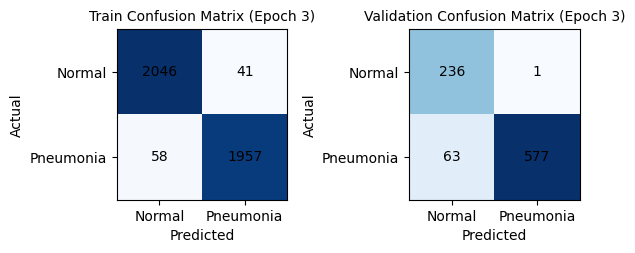

As seen in above matrix, the models have a tendency to more often misinterpret pneumonia for normal (FN) than the other way around. when we did our first try of training we had more false positives.    Changes in data augmentation techniques or preprocessing steps between the initial and subsequent training runs could have affected the model's ability to distinguish between normal and pneumonia cases. For example, different augmentation strategies might have introduced variations that the model learned to associate with one class over another.
 
#### Multiclass Classification Model
The multiclass classification model achieved the following performance metrics on the test set:
- Accuracy: 0.8255
- Macro Precision: 0.8258
- Macro Recall: 0.8222
- Macro F1-score: 0.8221

Per-class metrics:
- **Bacterial Pneumonia**:
  - Precision: 0.8653
  - Recall: 0.8321
  - F1-score: 0.8484
- **Normal**:
  - Precision: 0.9725
  - Recall: 0.8945
  - F1-score: 0.9319
- **Viral Pneumonia**:
  - Precision: 0.6395
  - Recall: 0.7399
  - F1-score: 0.6861

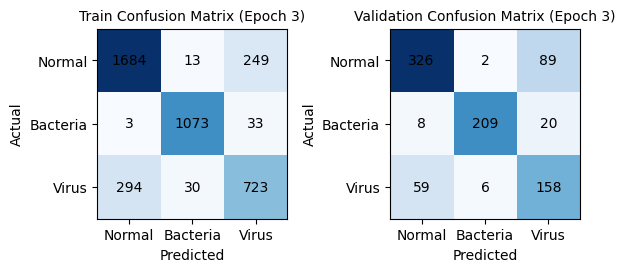

The difficulty in distinguishing between normal and viral pneumonia cases could be due to several factors. Normal and viral pneumonia cases might share similar visual features in chest X-ray images, making it challenging for the model to differentiate between them. If the dataset is imbalanced, as seen in ours, with fewer viral pneumonia cases compared to normal and bacterial cases, the model might not have enough examples to learn the distinguishing features effectively. Variations in image quality, such as differences in X-ray machine settings or patient positioning, could contribute to the misclassifications.


## Discussion
The results indicate that the binary classification model performs well, with high precision, recall, and F1-score. The multiclass classification model also performs well, though there is room for improvement, particularly in distinguishing viral pneumonia cases.

### Potential data leakage
We discovered when applying Grad-cam in `analysis_of_models.ipynb`, that the heatmaps indicated that the models were actually looking outside og the lungs area. This could indicate that the datasplit could have mixed pictures from the same patient of the different folders. As seen below the "warm" areas are outside of the lungs. 

#### Binary
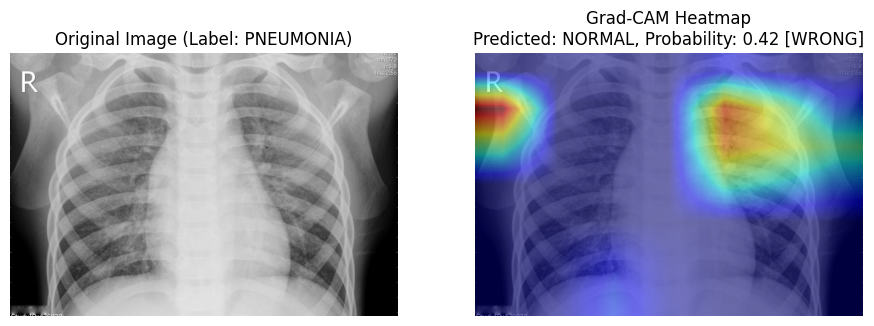
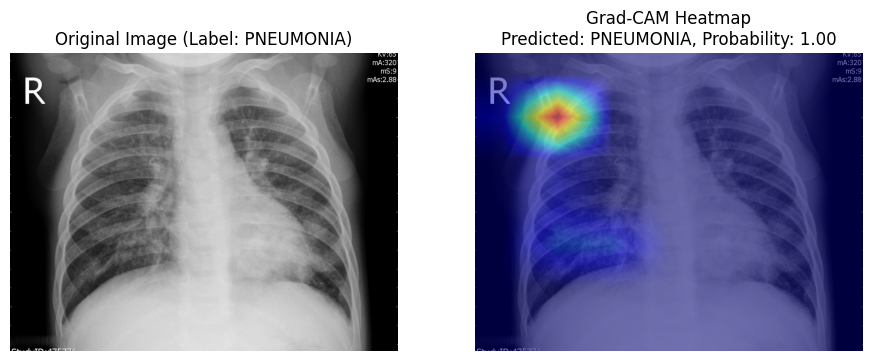
#### Multi
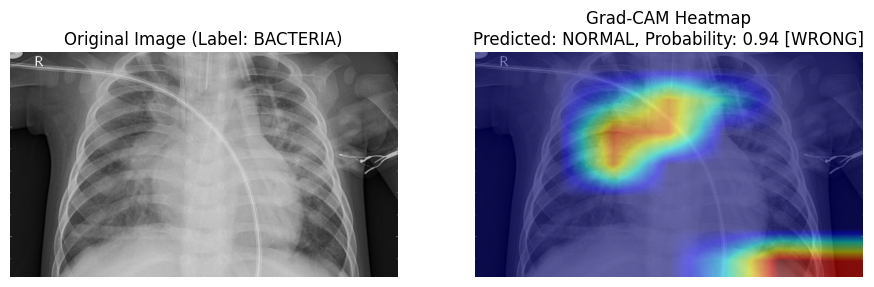
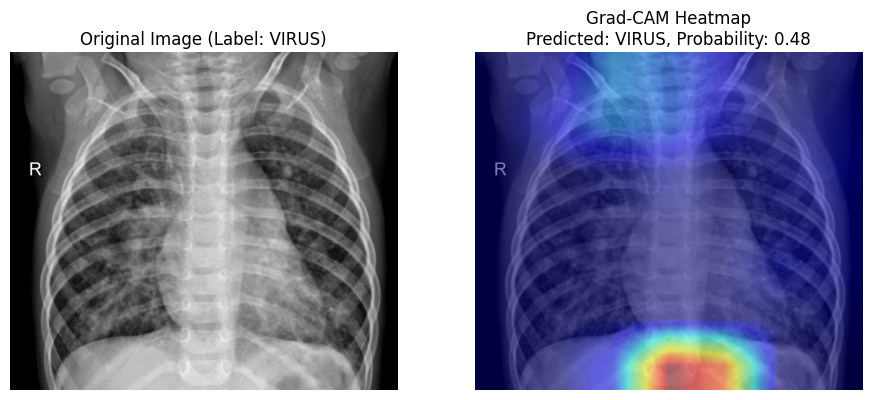

The fluctuations in the validation metrics (loss, precision, recall, F1-score, accuracy, AUC) can also be indicative of several factors, including potential data leakage, but they can also be due to other reasons such as the model focusing on noise in the pictures (as seen above). This seems to be true for both models, focusing more on noise then the alveolus (the small airsacs in the lungs).

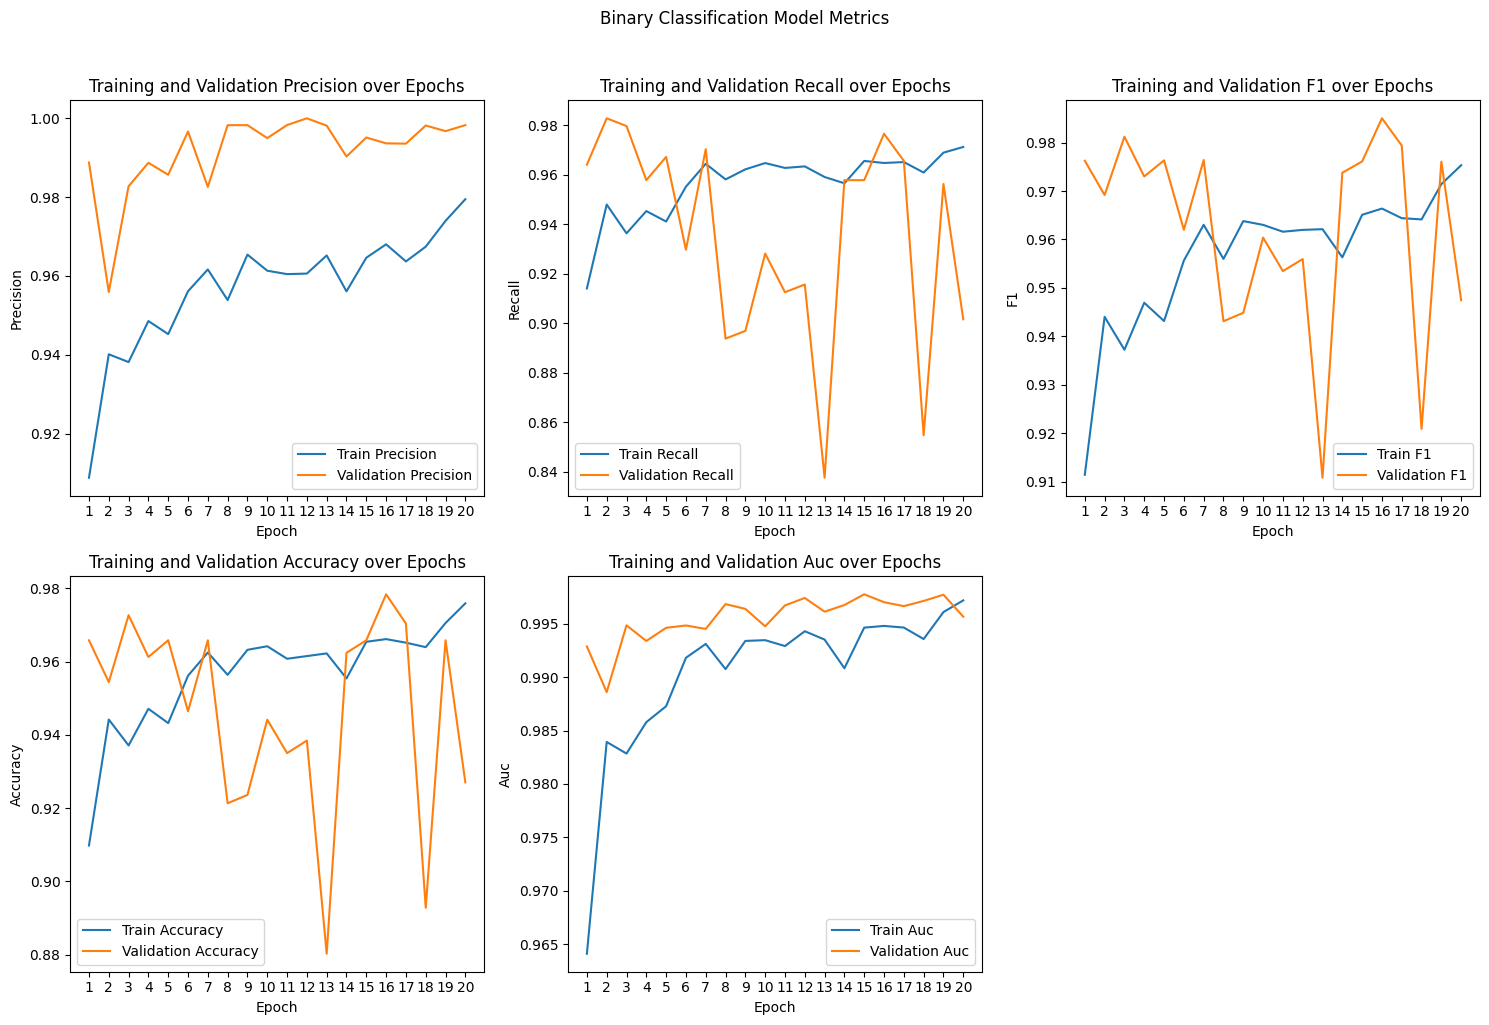

We don't see the same fluctuation in the multiclass model (see below), which had a larger patience for early stopping. This indicates that the early stopping patience for the binary model might have been more effective if set to 10 epochs as well.

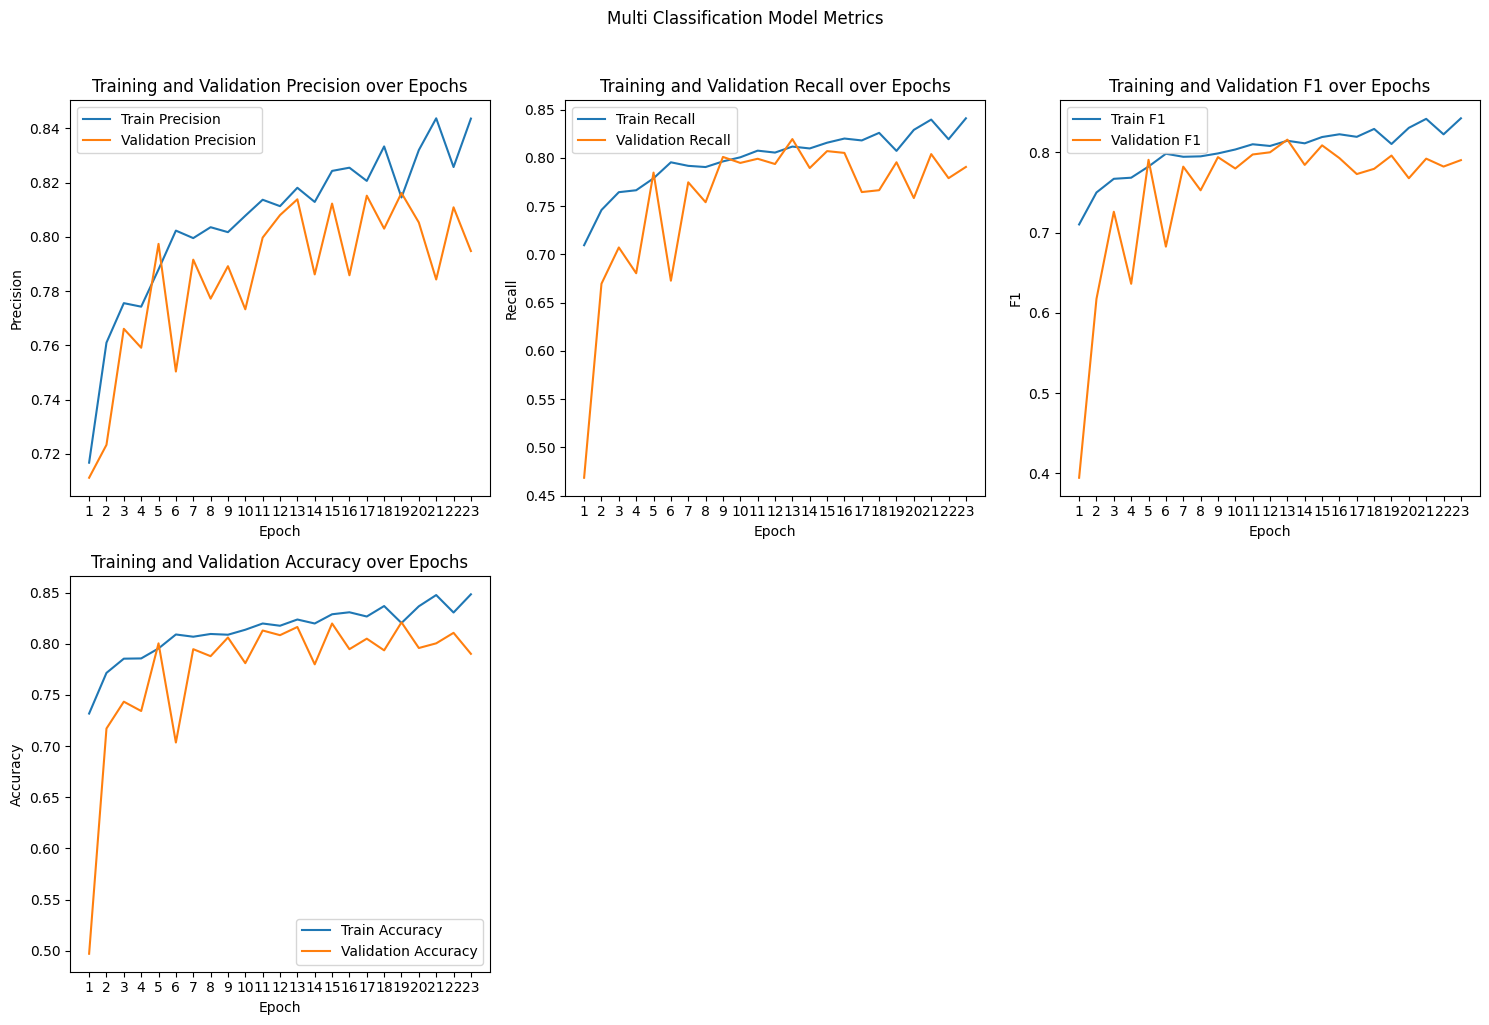

### Future Work

Future work could focus on:
1. Enhancing the multiclass model's performance, especially for viral pneumonia classification.
2. Experimenting with different data augmentation strategies and hyperparameter tuning.
3. Examine further whether the same patient exists in more than one folder (test, train, or val), or other potential data leakage.

## Conclusion

The PneumoScope project successfully developed and evaluated deep learning models for classifying chest X-ray images. The models demonstrated a good performance, particularly in binary classification, and provide a foundation for further improvements and applications in medical imaging.

----------------------------------------------------------------------
### Inference Process

Run the Flask App: Use the `app.py` script to start the Flask web application for real-time predictions:

```py
python app.py
```

Upload and Classify Images: Open your web browser and go to http://127.0.0.1:5000/. Upload a chest X-ray image to classify it as "Normal" or "Pneumonia".

The inference process involves using the trained model to make predictions on new chest X-ray images. Here is a summary of how the inference works:

1. **Load the Trained Model**:
   The trained model is loaded from a saved checkpoint file. The model's weights are restored to the state they were in after training.

2. **Preprocess the Input Image**:
   The input image is preprocessed to match the format expected by the model. This includes resizing the image, converting it to a tensor, and normalizing the pixel values.

3. **Perform Inference**:
   The preprocessed image is passed through the model to obtain the output logits. For binary classification, the logits are converted to probabilities using the sigmoid function. A threshold is applied to determine the final prediction (e.g., 0.5 for binary classification).

4. **Post-process the Output**:
   The model's output is mapped to a human-readable label (e.g., "Normal" or "Pneumonia").

5. **Display the Result**:
   The prediction result is displayed to the user.

#### Example Code for Inference

```python
from flask import Flask, request, render_template, redirect, url_for
import torch
from torchvision import transforms
from PIL import Image
import os
from src.model import PneumoNet

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
MODEL_PATH = "saved_models/best_model_20250113-012235_binary.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PneumoNet(num_classes=1, use_pretrained=False).to(device)
checkpoint = torch.load(MODEL_PATH, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Define the preprocessing pipeline
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return redirect(url_for('home'))
    
    file = request.files['file']
    if file.filename == '':
        return redirect(url_for('home'))
    
    # Save the file temporarily
    filepath = os.path.join("uploads", file.filename)
    os.makedirs("uploads", exist_ok=True)
    file.save(filepath)
    
    # Preprocess the image
    image = Image.open(filepath).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        logits = model(input_tensor).squeeze()
        prediction = (logits > 0).float().item()  # Binary classification: 1 (Pneumonia), 0 (Normal)
    
    # Cleanup uploaded file
    os.remove(filepath)
    
    # Map prediction to label
    result = "Pneumonia" if prediction == 1 else "Normal"
    return render_template('result.html', result=result)

if __name__ == '__main__':
    app.run(debug=True)